In [ ]:
from pyspark.sql import functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
silver_layer_path = "abfss://team1-project2@20230821desa.dfs.core.windows.net/SilverLayer"

#### Number of opened issues in January 2015

In [ ]:
issueDF = spark.read.parquet(f"{silver_layer_path}/issue").limit(500)

In [ ]:
issueDF1 = issueDF.select("created_at", "state").withColumn("Open Issue Count", col("state") == "open").count()

## Count of closed and open issues by date created utilizing notebook visualizations 

In [ ]:
display(issueDF)

#### Closer look at the bar graph displayed within the Issue Dataframe


![newplot](imgs/closed_open_issues.png)

## PushEvent data - determining whether the commit is on the main branch or not.
note: the following code can be condensed into fewer steps when doing analysis in production use. You can use split() and do the boolean logic in the same line, but for testing and explanation purposes, we have it separated.

In [ ]:
pushEventDF = spark.read.parquet(f"{silver_layer_path}/push-event").limit(100)

In [ ]:
# First, we create a new column that creates an array delimited by "/"
pushEventDF = pushEventDF.withColumn("ref_split", split(col("ref"), "/"))

In [ ]:
# Next, we create a column that that will hold a true or false value, to see if the third element in the array is called main or master
pushEventDF = pushEventDF.withColumn("main", (col("ref_split")[2] == "main") | (col("ref_split")[2] == "master"))

In [ ]:
# We can drop the "ref_split" column now since we won't need it
pushEventDF = pushEventDF.drop("ref_split")

In [ ]:
# See the last column called "main" to look at the new column that we created
display(pushEventDF)

Here is a pie chart to show the percentage of events that were on the main branch

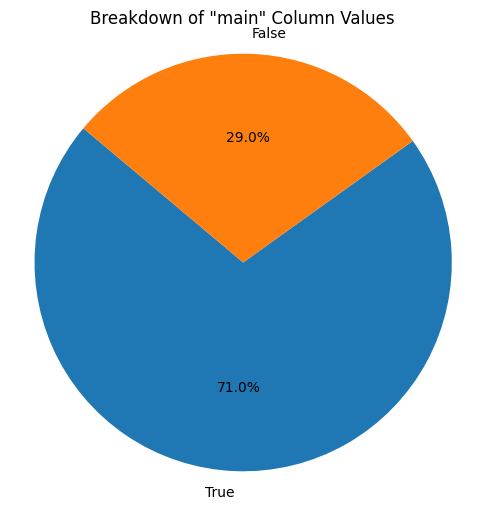

In [ ]:
import matplotlib.pyplot as plt

true_count = df.filter(df["main"] == True).count()
false_count = df.filter(df["main"] == False).count()

# Create a list of counts
counts = [true_count, false_count]

# Create labels for the pie chart
labels = ['True', 'False']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of "main" Column Values')
plt.axis('equal') 

plt.show()

## Data aggregated by type of GitHub event per hour

##### File Paths

In [ ]:
commit_comment_event_path = f"{silver_layer_path}/commit-comment-event"
create_event_path = f"{silver_layer_path}/create-event"
delete_event_path = f"{silver_layer_path}/delete-event"
fork_event_path = f"{silver_layer_path}/fork-event"
gollum_event_path = f"{silver_layer_path}/gollum-event"
issue_event_path = f"{silver_layer_path}/issue-event"
issue_comment_event_path = f"{silver_layer_path}/issue-comment-event"
member_event_path = f"{silver_layer_path}/member-event"
public_event_path = f"{silver_layer_path}/public-event"
pull_request_event_path = f"{silver_layer_path}/pull-request-event"
pull_request_review_comment_event_path = f"{silver_layer_path}/pull-request-review-comment-event"
pull_request_review_event_path = f"{silver_layer_path}/pull-request-review-event"
push_event_path = f"{silver_layer_path}/push-event"
release_event_path = f"{silver_layer_path}/release-event"
watch_event_path = f"{silver_layer_path}/watch-event"

##### Read in events as DataFrames

In [ ]:
commit_comment_event = spark.read.parquet(commit_comment_event_path)
create_event = spark.read.parquet(create_event_path)
delete_event = spark.read.parquet(delete_event_path)
fork_event = spark.read.parquet(fork_event_path)
gollum_event = spark.read.parquet(gollum_event_path)
issue_event = spark.read.parquet(issue_event_path)
issue_comment_event = spark.read.parquet(issue_comment_event_path)
member_event = spark.read.parquet(member_event_path)
public_event = spark.read.parquet(public_event_path)
pull_request_event = spark.read.parquet(pull_request_event_path)
pull_request_review_comment_event = spark.read.parquet(pull_request_review_comment_event_path)
pull_request_review_event = spark.read.parquet(pull_request_review_event_path)
push_event = spark.read.parquet(push_event_path)
release_event = spark.read.parquet(release_event_path)
watch_event = spark.read.parquet(watch_event_path)

##### DataFrames of only event type and hour created at

In [ ]:
commit_comment = (
    commit_comment_event.withColumn("event_type", lit("commit_comment"))
    .select("event_type", hour("created_at").alias("hour"))
)

create = (
    create_event.withColumn("event_type", lit("create"))
    .select("event_type", hour("created_at").alias("hour"))
)

delete = (
    delete_event.withColumn("event_type", lit("delete"))
    .select("event_type", hour("created_at").alias("hour"))
)

fork = (
    fork_event.withColumn("event_type", lit("fork"))
    .select("event_type", hour("created_at").alias("hour"))
)

gollum = (
    gollum_event.withColumn("event_type", lit("gollum"))
    .select("event_type", hour("created_at").alias("hour"))
)

issue = (
    issue_event.withColumn("event_type", lit("issue"))
    .select("event_type", hour("created_at").alias("hour"))
)

issue_comment = (
    issue_comment_event.withColumn("event_type", lit("issue_comment"))
    .select("event_type", hour("created_at").alias("hour"))
)

member = (
    member_event.withColumn("event_type", lit("member"))
    .select("event_type", hour("created_at").alias("hour"))
)

public = (
    public_event.withColumn("event_type", lit("public"))
    .select("event_type", hour("created_at").alias("hour"))
)

pull_request = (
    pull_request_event.withColumn("event_type", lit("pull_request"))
    .select("event_type", hour("created_at").alias("hour"))
)

pull_request_review_comment = (
    pull_request_review_comment_event.withColumn("event_type", lit("pull_request_review_comment"))
    .select("event_type", hour("created_at").alias("hour"))
)

pull_request_review = (
    pull_request_review_event.withColumn("event_type", lit("pull_request_review"))
    .select("event_type", hour("created_at").alias("hour"))
)

push = (
    push_event.withColumn("event_type", lit("push"))
    .select("event_type", hour("created_at").alias("hour"))
)

release = (
    release_event.withColumn("event_type", lit("release"))
    .select("event_type", hour("created_at").alias("hour"))
)

watch = (
    watch_event.withColumn("event_type", lit("watch"))
    .select("event_type", hour("created_at").alias("hour"))
)

In [ ]:
events_by_hour = (
    (
        commit_comment.union(create)
        .union(delete)
        .union(fork)
        .union(gollum)
        .union(issue)
        .union(issue_comment)
        .union(member)
        .union(public)
        .union(pull_request)
        .union(pull_request_review_comment)
        .union(pull_request_review)
        .union(push)
        .union(release)
        .union(watch)
    )
    .groupBy("event_type", "hour")
    .count()
)

In [ ]:
display(events_by_hour)

![events by hour](imgs/event_by_hour.png)